In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/riiid-sakt-model-dataset-public/group.pkl.zip
/kaggle/input/riiid-sakt-model-dataset-public/skills.pkl.zip
/kaggle/input/riiid-sakt-model-dataset-public/__notebook_source__.ipynb
/kaggle/input/riiid-sakt-model-dataset-public/submission.csv
/kaggle/input/riiid-sakt-model-dataset-public/sakt_model.pt


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/riiid-sakt-model-dataset-public/submission.csv')
df.head()

,row_id,answered_correctly
0,0,0.398105
1,1,0.923208
2,2,0.715975
3,3,0.851350
4,4,0.413131


In [4]:
df.columns

Index(['row_id', 'answered_correctly'], dtype='object')

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   row_id              104 non-null    int64  
 1   answered_correctly  104 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.8 KB
None


In [6]:
print(df.columns)

Index(['row_id', 'answered_correctly'], dtype='object')


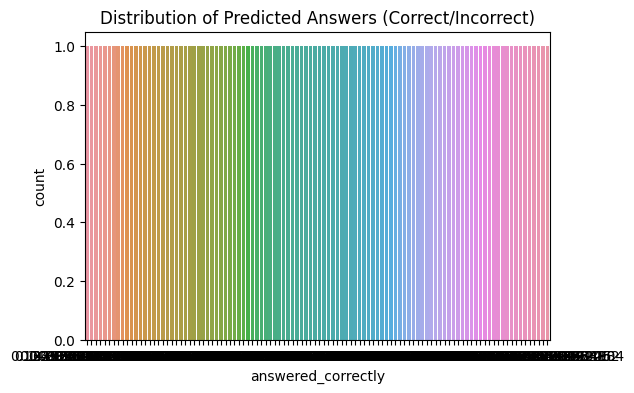

In [7]:
# Plot the distribution of predicted correctness
plt.figure(figsize=(6,4))
sns.countplot(x='answered_correctly', data=df)
plt.title('Distribution of Predicted Answers (Correct/Incorrect)')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Sample fake training data for demonstration (features + target)
# Normally you should load actual training data with features!
import numpy as np
np.random.seed(0)
X = np.random.rand(1000, 5)  # 5 random features
y = (X[:, 0] + X[:, 1] * 0.5 + np.random.randn(1000) * 0.1 > 0.7).astype(int)  # binary target

In [9]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
# Predict on test set
y_pred = model.predict(X_test)

# Accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

Accuracy: 0.9300


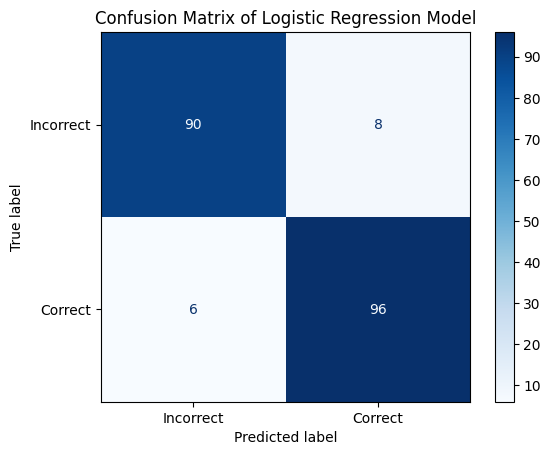

In [12]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Incorrect', 'Correct'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix of Logistic Regression Model')
plt.show()